In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import load_diabetes

In [36]:
d = load_diabetes()

In [37]:
d

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [38]:
df = pd.DataFrame(d.data,columns = d.feature_names)

In [39]:
df['Target'] = d.target

In [40]:
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0


In [41]:
df.shape

(442, 11)

In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Target'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [44]:
x = df.iloc[:,:10]
y = df.iloc[:,-1]

In [45]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [46]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, Length: 442, dtype: float64

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 45)

In [60]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(x_test)

In [64]:
y_pred

array([226.51666145, 157.46174876,  89.85952394, 207.92164744,
       175.26801312, 146.48388955, 131.11418872,  97.37619407,
       102.94176683, 181.69421036, 237.97133408, 134.74602577,
       189.44001676,  59.93090877, 179.98603311, 117.78640765,
       120.30704482, 126.66365457, 165.19760646, 147.7794185 ,
       145.43611319, 124.41603451,  51.95784538, 227.75026698,
       218.09974354, 129.82788151, 160.13813249, 201.1733737 ,
       184.84256427,  68.91311254, 237.00908624,  58.17038384,
       154.40273359, 119.16002486, 234.03288057, 172.80124283,
       139.94748943, 169.99141456, 214.59266744, 220.47790767,
       128.98001836, 186.20573984, 162.87312596, 179.77626906,
       107.76819766, 249.53008184, 140.92296676,  32.74662537,
       177.96075481, 145.76735049, 291.96466984, 125.71393834,
       107.27437771, 156.10370698, 115.93097942, 160.35431782,
       229.47682139, 173.38591961, 159.88140556, 123.04674096,
        88.5518427 , 122.87575187, 169.12903634, 101.97

In [65]:
y_test

208    155.0
402    168.0
128    115.0
285    233.0
317    190.0
       ...  
102    302.0
386     72.0
222    252.0
424    111.0
334     72.0
Name: Target, Length: 89, dtype: float64

In [66]:
r2_score(y_test,y_pred)

0.5188118914964637

In [67]:
lr.coef_

array([  23.45388514, -247.43107084,  492.10188174,  329.36498638,
       -970.79784704,  573.54460121,  182.41386124,  255.9162021 ,
        794.21654496,   89.32074078])

In [68]:
lr.intercept_

152.13619339070766

In [69]:
np.sqrt(mean_absolute_error(y_test,y_pred))

6.275720947746368

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

48.72710829141399

In [71]:
# Now we can calculte from ridge class
from sklearn.linear_model import Ridge

In [72]:
R = Ridge(alpha = 0.0001)

In [74]:
R.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [76]:
y_pred1 = R.predict(x_test)

In [77]:
r2_score(y_test,y_pred1)

0.5189738344370787

# now we take one diamentional data and check how line rotate wiith respect to m and b 

In [78]:
from sklearn.datasets import make_regression

In [84]:
x1,y1 = make_regression(n_samples = 100,n_features=1,n_informative = 1,n_targets = 1, noise  = 20, random_state = 13)

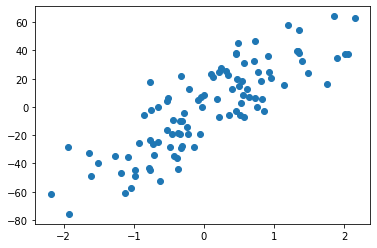

In [85]:
plt.scatter(x1,y1)

In [86]:
lr1 = LinearRegression()

In [89]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size =0.2,random_state = 20)

In [90]:
print(x1_train.shape,x1_test.shape)
print(y1_train.shape,y1_test.shape)

(80, 1) (20, 1)
(80,) (20,)


In [91]:
lr1.fit(x1_train,y1_train)

LinearRegression()

In [95]:
y1_pred = lr1.predict(x1_test)

In [96]:
r2_score(y1_test,y1_pred)

0.7421885477454948

In [98]:
np.sum(mean_absolute_error(y1_test,y1_pred))

13.84103285143479

In [99]:
np.sqrt(mean_squared_error(y1_test,y1_pred))

16.177405493525335

In [100]:
lr1.intercept_

-0.8579056026304344

In [101]:
lr1.coef_

array([26.86903392])

In [108]:
# now Ridge regretion
rr = Ridge(alpha=10)
rr.fit(x1_train,y1_train)

print(rr.coef_)
print(rr.intercept_)


[23.58514157]
-0.7860572955778091


In [110]:
rr.predict(x1_test)


array([ 12.48876382,  -9.51529739, -11.48787144,  27.29689512,
        16.41141356,  20.76464658,   4.11493638,   4.34257088,
       -17.58789191,  26.06168878,  11.76920716,  -9.85354622,
       -13.29390428,  13.51334651,  19.52573488, -23.99762866,
        49.93102941, -25.44142491,  12.1366736 , -26.42738902])

In [111]:
y1_test

array([ -7.39169323, -18.63814231, -19.08818775,  57.82136287,
         6.33015059,  35.9187182 ,  25.02898878,  -6.88808416,
       -34.31988063,  15.84117881,   2.54005098, -35.8452002 ,
       -16.14322619,  12.47602642,  -2.90750046, -48.6320699 ,
        62.8216706 , -57.13912422,  18.11747901, -35.23732979])

In [112]:
r2_score(y1_test,rr.predict(x1_test))

0.7088248264938567

In [130]:
rr1 = Ridge(alpha=150)
rr1.fit(x1_train,y1_train)
rr1.predict(x1_test)

print(rr1.coef_)
print(rr1.intercept_)
print(r2_score(y1_test,rr1.predict(x1_test)))


[8.69960581]
-0.46037653923008703
0.35566228015261925


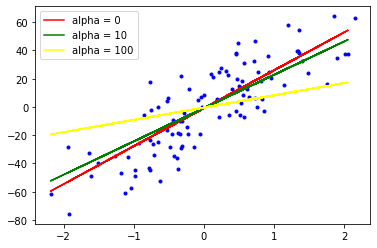

In [131]:
plt.plot(x1,y1,'b.')
plt.plot(x1_train,lr1.predict(x1_train),color = 'red',label = 'alpha = 0')
plt.plot(x1_train,rr.predict(x1_train),color = 'green',label = 'alpha = 10')
plt.plot(x1_train,rr1.predict(x1_train),color = 'yellow',label = 'alpha = 100')
plt.legend()

In [140]:
# crate a class for the same 
class MeraRidge:
    
        
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
            
    def fit(self,x1_train,y1_train):
        num = 0
        den = 0
            
        for i in range(x1_train.shape[0]):
            
            num = num + (y1_train[i] - y1_train.mean())*(x1_train[i] - x1_train.mean())
            den = den + ((x1_train[i] - x1_train.mean()) * (x1_train[i] - x1_train.mean()))
                
        self.m = num/(den + self.alpha)
            
        self.b = y1_train.mean() - (self.m*x1_train.mean())
        print(self.m,self.b)
        
    def predict(x_test):
        pass]
             

In [145]:
reg1 = MeraRidge(alpha=100)

In [146]:
reg1.fit(x1_train,y1_train)

[11.23120016] [-0.51576531]


In [ ]:
# Now we took more than 2 column data set 

In [147]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [148]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

In [149]:
from sklearn.linear_model import Ridge

In [151]:
reg = Ridge(alpha = 0.1, solver = 'cholesky')

In [152]:
reg.fit(x2_train,y2_train)

Ridge(alpha=0.1, solver='cholesky')

In [154]:
reg.predict(x2_test)

array([-22.40858957,  52.76140551,  48.3220901 ,  15.89395624,
       -29.28136074,  -6.81709404, -22.02448484, -31.29529784,
        -1.32289297, -17.90491094,  10.85248481, -13.42219475,
        -9.69897688, -10.33589514,  -7.48928905,  34.40178706,
       -21.86276317, -15.28285692, -33.03533525,  12.17469567])

In [155]:
r2_score(y2_test,reg.predict(x2_test))

0.6817951827681725